In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [3]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971



Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.).

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. Гистограммы удобно строить методом plot Pandas DataFrame с аргументом kind='hist'.

**Пример**. Построим гистограмму распределения роста подростков из выборки data. Используем метод plot для DataFrame data c аргументами y='Height' (это тот признак, распределение которого мы строим)

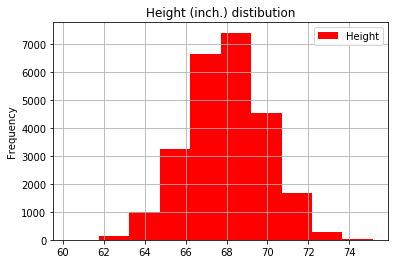

In [4]:
data.plot(y='Height', kind='hist',
             color='red', title='Height (inch.) distibution', grid=True)

In [5]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


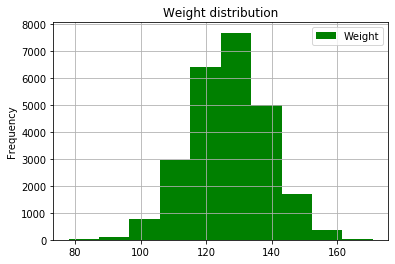

In [6]:
data.plot(y='Weight', kind='hist',
            color='green', title = 'Weight distribution', grid=True)

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m×m$  графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода  scatter_matrix  Pandas Data Frame или pairplot библиотеки Seaborn.

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH)** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'],
                                              row['Weight']), axis=1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

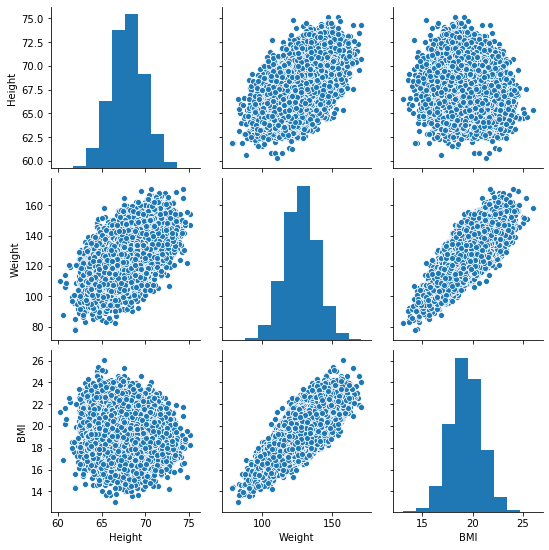

In [9]:
sns.pairplot(data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

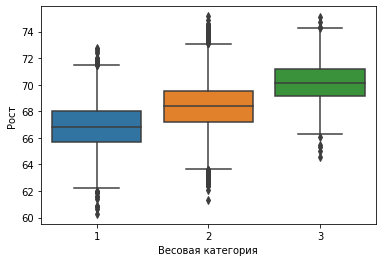

In [10]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
ax = sns.boxplot(x = 'weight_cat', y = 'Height', data= data)
plt.xlabel('Весовая категория')
plt.ylabel('Рост')
plt.show()

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

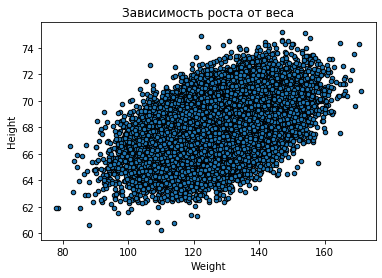

In [11]:
# use edgecolors to highlit points with outline 
data.plot( x = 'Weight', y = 'Height', kind = 'scatter', edgecolors='black',
          title ='Зависимость роста от веса' )

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных.

In [12]:
def error(w0,w1):
    rdata, cdata = data.shape
    error = np.zeros(rdata)
    error = (data['Height'] - (w0 + w1*data['Weight']))**2
    return error.sum()
error(3,2)

907164279.8693775

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

[75, 180, 60, 80]

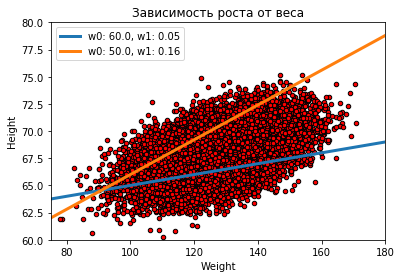

In [17]:
# lambda-функция прямой
lineFunc = lambda x, w0, w1: w0 + w1*x

#массив точек по оси X
pointsNum = 100
xLines = np.linspace(0,200, 100)

#массив значений коэффициентов прямых
wLine = np.array( [[60., 0.05], [50, 0.16]] )
rwLine, cwLine = wLine.shape

##массив точек по оси Y
yLines = np.zeros( (rwLine, pointsNum) )
for i in range(rwLine):
    yLines[i] = np.array( lineFunc(xLines, wLine[i, 0], wLine[i, 1]) )


# график точек
data.plot( x = 'Weight', y = 'Height', kind = 'scatter', color='r', edgecolors='black',
          title ='Зависимость роста от веса' )
# прямые 
for i in range(rwLine):
    text = 'w0: ' + str(wLine[i, 0]) + ', w1: ' + str(wLine[i, 1])
    plt.plot(xLines, yLines[i], linewidth=3.0, label=text)

plt.legend()
plt.axis( [75, 180, 60, 80] )




Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

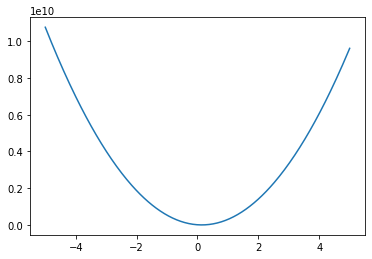

In [18]:
w1 = np.linspace(-5, 5, 300)
y = [error(50,x) for x in w1]
plt.plot(w1, y)
#print(y)

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [20]:
from scipy.optimize import minimize_scalar

optw1Res = minimize_scalar(lambda w: error(50., w), bounds=(-5,5))
optw1 = optw1Res.x
print(optw1)
res_y = 50 + optw1*w1

0.1410920372883438


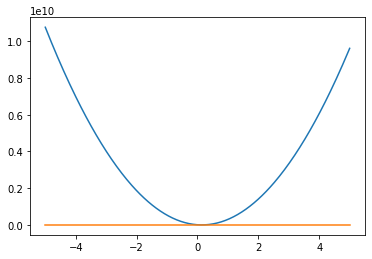

In [21]:
w1 = np.linspace(-5, 5, 300)
y = [error(50,x) for x in w1]
plt.plot(w1, y)
plt.plot(w1, res_y)

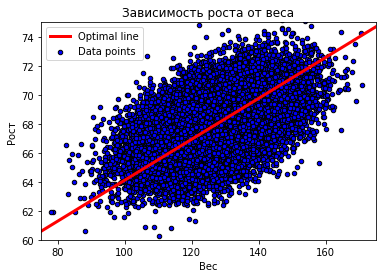

In [22]:
#значения линейной аппроксимации для оптимального значения w1
yLinesOpt = np.array( lineFunc(xLines, 50.,  optw1) )

#построение графиков
dataPlot = data.plot(x='Weight', y='Height', kind='scatter', 
                     color='blue', edgecolor='black', title=u'Зависимость роста от веса', label=u'Data points')
dataPlot.set(xlabel=u'Вес', ylabel=u'Рост')

plt.plot(xLines, yLinesOpt, c='red', label=u'Optimal line', linewidth=3)

plt.legend()
plt.axis( [75, 175, 60, 75] )
plt.title(u'Зависимость роста от веса')
plt.xlabel(u'Вес')
plt.ylabel(u'Рост')
    
plt.show()


При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [23]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

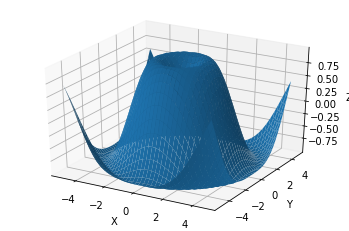

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get currnet axis

# Создаем массивы NumPy с координатами точек по осям X и Y.
# Используем метод mtshgrid, при котором по векторам координат 
# создается матрица кооридинат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

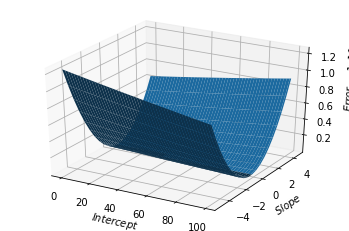

In [25]:
from mpl_toolkits.mplot3d import Axes3D
error_vec = np.vectorize(error)
fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(-0, 100, 1)
w1 = np.arange(-5, 5, 0.5)
w0, w1 = np.meshgrid(w0, w1)
Z = error_vec(w0.ravel(),w1.ravel())
Z.shape = w0.shape


surf = ax.plot_surface(w0,w1,Z)
ax.set_xlabel('$Intercept$')
ax.set_ylabel('$Slope$')
ax.set_zlabel('$Error$')
plt.show()

In [26]:
w0.ravel()


array([ 0,  1,  2, ..., 97, 98, 99])

**[11].** С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  𝑤0  в диапазоне [-100,100] и  𝑤1  - в диапазоне [-5, 5]. Начальная точка – ( 𝑤0 ,  𝑤1 ) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров  𝑤0  и  𝑤1 . Подпишите оси и график.

In [27]:
from scipy.optimize import minimize 

def error_l(w):
    w0_p = w[0]*pd.Series(np.ones(2500), index = range(1,2501))
    return (((data['Height'] - w0_p+ w[1]*data['Weight']))**2).sum()\
            /data['Height'].count()

res = minimize(error_l, x0 = (0,0), method = 'L-BFGS-B',
               bounds = ((-100.,100.), (-5.,5.)))
res.x[0] + res.x[1]

57.091310448741694

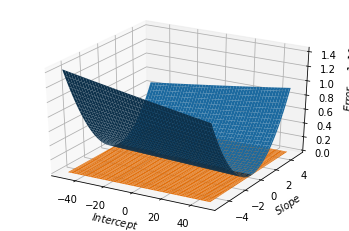

In [28]:
def line(s1,s2):
    return res.x[0]*s1 + res.x[1]*s2


fig = plt.figure()
ax = fig.gca(projection='3d')

error_vec = np.vectorize(error)
line_vec =np.vectorize(line)

w0 = np.arange(-50, 50, 1)
w1 = np.arange(-5, 5, 0.1)
w0, w1 = np.meshgrid(w0, w1)
Z = error_vec(w0,w1)
y = line_vec(w0, w1)


surf_1 = ax.plot_surface(w0,w1,Z)
surf_2 = ax.plot_surface(w0, w1, y) 

ax.set_xlabel('$Intercept$')
ax.set_ylabel('$Slope$')
ax.set_zlabel('$Error$')





plt.show()

In [115]:
y.shape

(100, 100)

In [118]:
w0.shape

(100, 100)